In [3]:
## No supervisado

import pandas as pd

from sklearn.cluster import MiniBatchKMeans

if __name__ == "__main__":

    dataset = pd.read_csv("./data/candy.csv")
    print(dataset.head(10))


       competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0           100 Grand          1       0        1               0       0   
1        3 Musketeers          1       0        0               0       1   
2            One dime          0       0        0               0       0   
3         One quarter          0       0        0               0       0   
4           Air Heads          0       1        0               0       0   
5          Almond Joy          1       0        0               1       0   
6           Baby Ruth          1       0        1               1       1   
7  Boston Baked Beans          0       0        0               1       0   
8          Candy Corn          0       0        0               0       0   
9  Caramel Apple Pops          0       1        1               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1       

In [5]:
X = dataset.drop('competitorname', axis=1)

kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)
print("Total de centros: ", len(kmeans.cluster_centers_))
print("="*64)
print(kmeans.predict(X))

Total de centros:  4
[1 1 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 1 0 1 2 0 3 2 2 0 1 1 0 0 3
 1 1 0 0 0 1 1 2 2 0 1 2 2 2 3 3 3 3 2 1 2 2 2 1 0 2 0 3 1 1 0 1 2 2 2 2 0
 0 2 0 0 0 3 0 2 0 2 0]


/Users/jeffreysmac/Desktop/Scikit-Learn/entorno/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
#implementamos lo anterior en una nueva columna de nuestro data set original

dataset['group'] = kmeans.predict(X)

print(dataset)

                competitorname  chocolate  fruity  caramel  peanutyalmondy  \
0                    100 Grand          1       0        1               0   
1                 3 Musketeers          1       0        0               0   
2                     One dime          0       0        0               0   
3                  One quarter          0       0        0               0   
4                    Air Heads          0       1        0               0   
..                         ...        ...     ...      ...             ...   
80                   Twizzlers          0       1        0               0   
81                    Warheads          0       1        0               0   
82        WelchÕs Fruit Snacks          0       1        0               0   
83  WertherÕs Original Caramel          0       0        1               0   
84                    Whoppers          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent

<AxesSubplot: xlabel='sugarpercent', ylabel='winpercent'>

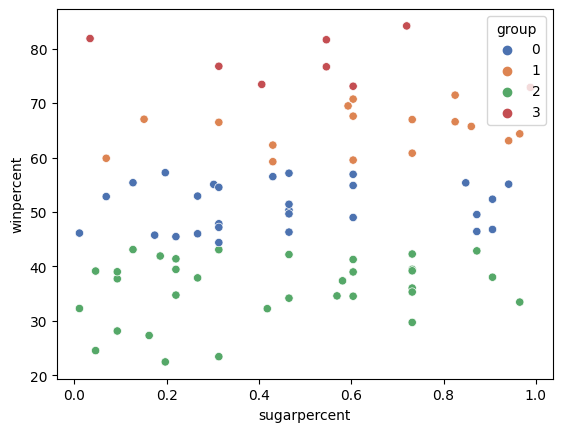

In [7]:
#ahora procedemos a visualizar los datos
import seaborn as sns
sns.scatterplot(data=dataset, x="sugarpercent", y="winpercent", hue="group",palette="deep")

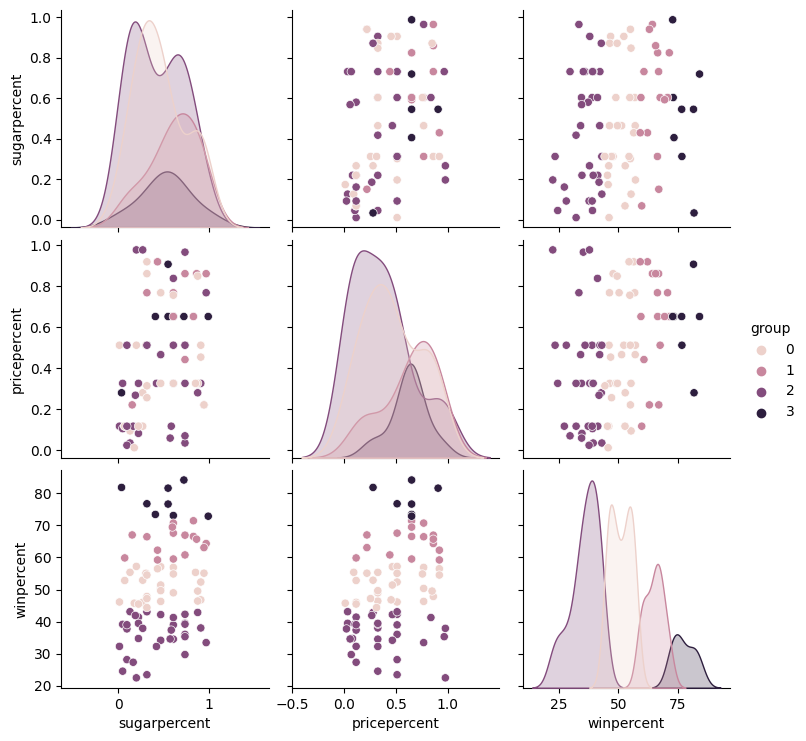

In [9]:


import seaborn as sns
sns.pairplot(dataset[['sugarpercent','pricepercent','winpercent','group']], hue = 'group')